# Qualification Analysis v2

In [ ]:
## Version 2 is in progress for iteration and company 2. Removed all of step 3, steps 5 quartiles calcs and all of step 6 from v1.

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import scipy.stats as st
import numpy as np
from pathlib import Path

## Step 1: Quantification
First I created a csv including required and preferred qualifications from the job posting. I also added a 'qualification_category' and qualification_title'. Saved here: ![company2_requirements.csv](qualification_requirements/company2_requirements.csv)

In [2]:
# Set path for csv file as a variable using pathlib python library via Path.
PATH = Path("qualification_requirements/company2_requirements.csv")

# Convert csv to a DataFrame via pandas python library via pd.
csv_file_df = pd.read_csv(PATH)

In [3]:
# Drop NaN and assign the result back to the DataFrame
csv_file_df = csv_file_df.dropna(how="all")

# Start index with 1 not 0.
csv_file_df.index = [i + 1 for i in range(len(csv_file_df))]

# Rename columns and DataFrame
requirements_df = csv_file_df.rename(columns= {
    'qualifcation_category': 'category',
    'qualification_title': 'title',
    'qualification_description': 'description'
})
# Display DataFrame
requirements_df

,category,title,description
1,required,Education and Experience,Bachelor's Degree AND 4+ years experience in e...
2,required,Cross-Functional Projects,2+ years experience managing cross-functional ...
3,preferred,Preferred Experience,Bachelor's Degree AND 8+ years experience in e...
4,preferred,Preferred Cross-Functional Projects,6+ years experience managing cross-functional ...
5,preferred,Construction Management,5+ years’ experience in a construction project...
6,preferred,Coding,1+ year(s) experience reading and/or writing c...
7,preferred,Project Controls,Construction industry experience with a backgr...
8,preferred,Collaboration,Ability to build collaborative relationships a...
9,preferred,Effective Skills,"Proficient communication, presentation, and an..."
10,preferred,Problem Solving,Proficient problem-solving and critical thinki...


## Step 2: Scoring My Qualifications
Rate my level of qualification for each requirement on a scale (e.g., 0-10, where 10 is fully qualified).

In [4]:
# Create a new column for qualification scores
requirements_df['score'] = ''

# Loop through the DataFrame rows
for index, row in requirements_df.iterrows():
    qualification = row['title']
    
    # Prompt to rate the qualification
    rating = input(f"Rate your qualification for '{qualification}' (0-10): ")
    
    # Validation loop
    while not rating.isdigit() or not (0 <= int(rating) <= 10):
        print("Invalid input. Please enter a number between 0 and 10.")
        rating = input(f"Rate your qualification for '{qualification}' (0-10): ")
    
    # Store rating in the DataFrame
    requirements_df.at[index, 'score'] = int(rating)

# Rename DataFrame
requirement_scores = requirements_df

Rate your qualification for 'Education and Experience  ' (0-10): 10
Rate your qualification for 'Cross-Functional Projects  ' (0-10): 10
Rate your qualification for 'Preferred Experience  ' (0-10): 7
Rate your qualification for 'Preferred Cross-Functional Projects  ' (0-10): 10
Rate your qualification for 'Construction Management  ' (0-10): 10
Rate your qualification for 'Coding  ' (0-10): 5
Rate your qualification for 'Project Controls  ' (0-10): 10
Rate your qualification for 'Collaboration  ' (0-10): 8
Rate your qualification for 'Effective Skills  ' (0-10): 8
Rate your qualification for 'Problem Solving  ' (0-10): 9
Rate your qualification for 'GC/Owner Experience  ' (0-10): 10
Rate your qualification for 'Analytics/Project Controls  ' (0-10): 9
Rate your qualification for 'Production Applications  ' (0-10): 8
Rate your qualification for 'Resilient Team Player ' (0-10): 8


In [5]:
# Display updated DataFrame
requirement_scores

,category,title,description,score
1,required,Education and Experience,Bachelor's Degree AND 4+ years experience in e...,10
2,required,Cross-Functional Projects,2+ years experience managing cross-functional ...,10
3,preferred,Preferred Experience,Bachelor's Degree AND 8+ years experience in e...,7
4,preferred,Preferred Cross-Functional Projects,6+ years experience managing cross-functional ...,10
5,preferred,Construction Management,5+ years’ experience in a construction project...,10
6,preferred,Coding,1+ year(s) experience reading and/or writing c...,5
7,preferred,Project Controls,Construction industry experience with a backgr...,10
8,preferred,Collaboration,Ability to build collaborative relationships a...,8
9,preferred,Effective Skills,"Proficient communication, presentation, and an...",8
10,preferred,Problem Solving,Proficient problem-solving and critical thinki...,9


## Step 3: Visual Representation - Radar Chart
Create a radar chart to visually represent the raw scores. Each axis represents one of the skills or experiences, and the plotted points reflect my score. This visual displays how well-rounded my skills are in relation to the job requirements. I used the raw scores not weighted scores to standardize the radar circle to 10.


In [6]:
# Strip leading and trailing spaces in the 'title' column
requirement_scores['title'] = requirement_scores['title'].str.strip()

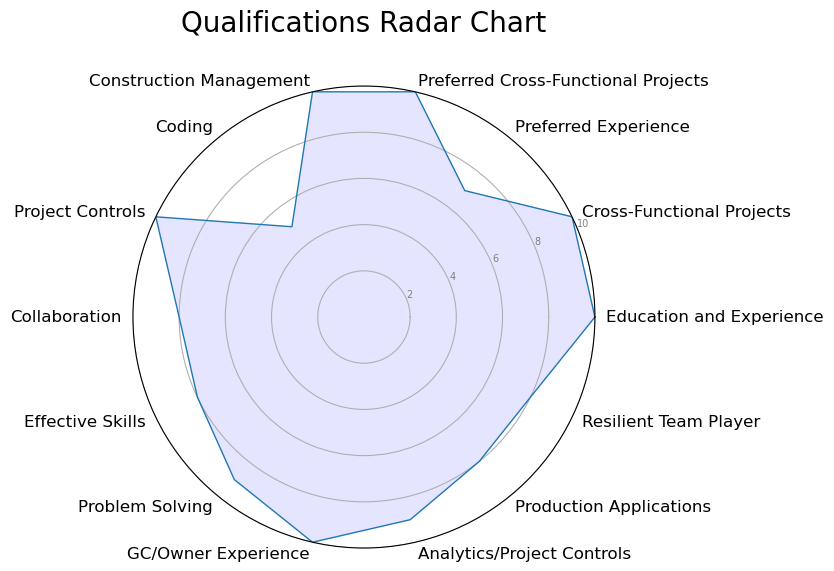

In [7]:
# Number of variables we're plotting.
categories = list(requirement_scores['title'])
values = requirement_scores['score'].tolist()
N = len(categories)

# Create angle of each axis. Divide the plot / number of variable
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completes the loop

# Initialise plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': 'polar'})

# Draw one axe per variable + add labels
for angle, category in zip(angles, categories):
    if category in ['Preferred Cross-Functional Projects',
                    'Preferred Experience',
                    'Cross-Functional Projects', 
                    'Education and Experience',
                    'Resilient Team Player',
                    'Production Applications',
                    'Analytics/Project Controls'
                    ]:
        ha = 'left'
    else:
        ha = 'right'
    ax.text(angle, 10.5, category, ha=ha, va='center', fontsize=12, color='black')  # Increased font size to 12

# Remove angle labels
ax.set_xticks([])

# Draw ylabels
plt.yticks([2, 4, 6, 8, 10], ["2", "4", "6", "8", "10"], color="grey", size=7)
plt.ylim(0, 10)

# Ind1
values = requirement_scores['score'].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Score")
ax.fill(angles, values, 'b', alpha=0.1)

# Add title
plt.title('Qualifications Radar Chart', size=20, color='black', y=1.1)

# Save to png
fig.savefig('visualizations/company2_qualifiations.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

## Step 5: Statistical Measurements
To incorporate statistical measurements:
Mean: Calculate the average weighted score across all categories to show my overall qualification level.
Standard Deviation: Measure the variance in my scores to show strengths (high scores) and areas for development (low scores).

In [8]:
# Initialize lists to store required and desired scores
required_scores = []
desired_scores = []

# Loop through the DataFrame to determine if a qualification is required or not
for index, row in requirement_scores.iterrows():
    if row['category'] == 'required':
        required_scores.append(row['score'])
    elif row['category'] == 'preferred':
        desired_scores.append(row['score'])

# Convert lists to numpy arrays
required_scores = np.array(required_scores)
desired_scores = np.array(desired_scores)

# Calculate mean and standard deviation for required qualifications
mean_score_required = round(np.mean(required_scores), 1)
std_deviation_required = round(np.std(required_scores), 1)

# Calculate mean and standard deviation for desired qualifications
mean_score_desired = round(np.mean(desired_scores), 1)
std_deviation_desired = round(np.std(desired_scores), 1)

# Calculate mean and standard deviation for all qualifications using weighted_score
mean_score = round(np.mean(requirement_scores['score']), 1)
std_deviation = round(np.std(requirement_scores['score']), 1)

print(f"Required Qualifications - Statistical Measurements\n"
      f"Mean Score: {mean_score_required}\n"
      f"Standard Deviation: {std_deviation_required}\n\n"
      f"Desired Qualifications - Statistical Measurements\n"
      f"Mean Score: {mean_score_desired}\n"
      f"Standard Deviation: {std_deviation_desired}\n\n"
      f"All Qualifications - Statistical Measurements\n"
      f"Mean Score: {mean_score}\n"
      f"Standard Deviation: {std_deviation}\n\n"
     )

Required Qualifications - Statistical Measurements
Mean Score: 10.0
Standard Deviation: 0.0

Desired Qualifications - Statistical Measurements
Mean Score: 8.5
Standard Deviation: 1.4

All Qualifications - Statistical Measurements
Mean Score: 8.7
Standard Deviation: 1.4




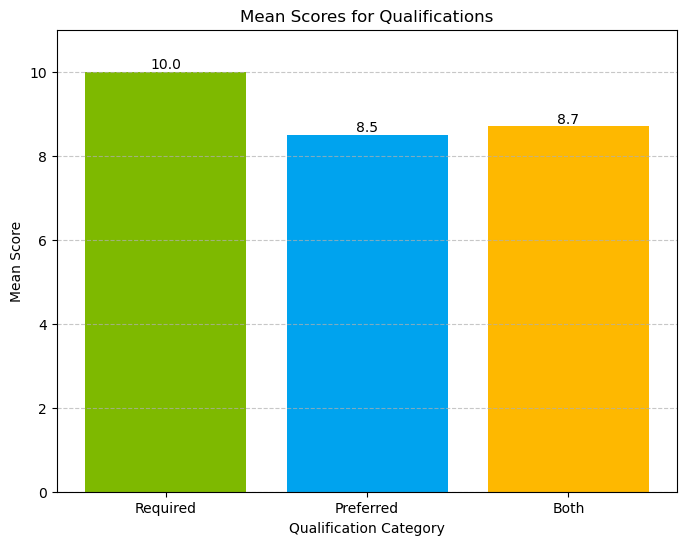

In [21]:
# Mean scores
mean_scores = [mean_score_required, mean_score_desired, mean_score]
categories = ['Required', 'Preferred', 'Both']

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, mean_scores, color=['#7EB900', '#00A3EE', '#FEB800'], alpha=1)
plt.title('Mean Scores for Qualifications')
plt.xlabel('Qualification Category')
plt.ylabel('Mean Score')
plt.ylim(0, max(mean_scores) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for bar, score in zip(bars, mean_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score, f'{score:.1f}', ha='center', va='bottom')

# Save to png
plt.savefig('visualizations/company2_mean_scores.png', dpi=300, bbox_inches='tight')

plt.show()